--- Day 6: Universal Orbit Map ---

You've landed at the Universal Orbit Map facility on Mercury. Because navigation in space often involves transferring between orbits, the orbit maps here are useful for finding efficient routes between, for example, you and Santa. You download a map of the local orbits (your puzzle input).

Except for the universal Center of Mass (COM), every object in space is in orbit around exactly one other object. An orbit looks roughly like this:

                  \
                   \
                    |
                    |
AAA--> o            o <--BBB
                    |
                    |
                   /
                  /

In this diagram, the object BBB is in orbit around AAA. The path that BBB takes around AAA (drawn with lines) is only partly shown. In the map data, this orbital relationship is written AAA)BBB, which means "BBB is in orbit around AAA".

Before you use your map data to plot a course, you need to make sure it wasn't corrupted during the download. To verify maps, the Universal Orbit Map facility uses orbit count checksums - the total number of direct orbits (like the one shown above) and indirect orbits.

Whenever A orbits B and B orbits C, then A indirectly orbits C. This chain can be any number of objects long: if A orbits B, B orbits C, and C orbits D, then A indirectly orbits D.

For example, suppose you have the following map:

COM)B
B)C
C)D
D)E
E)F
B)G
G)H
D)I
E)J
J)K
K)L

Visually, the above map of orbits looks like this:

        G - H       J - K - L
       /           /
COM - B - C - D - E - F
               \
                I

In this visual representation, when two objects are connected by a line, the one on the right directly orbits the one on the left.

Here, we can count the total number of orbits as follows:

    D directly orbits C and indirectly orbits B and COM, a total of 3 orbits.
    L directly orbits K and indirectly orbits J, E, D, C, B, and COM, a total of 7 orbits.
    COM orbits nothing.

The total number of direct and indirect orbits in this example is 42.

What is the total number of direct and indirect orbits in your map data?


In [95]:
with open('input6.txt', 'r') as f:
    x = f.readlines()
    
y = [s[:-1] for s in x]
y = y[:-1]
y1 = [s.split(')') for s in y]


In [74]:
def nodes_and_edges(listForm):
    edges = [s.split(')') for s in listForm]
    nodes = []
    for pair in edges: 
        for x in pair:
            # check if exists in unique_list or not 
            if x not in nodes: 
                nodes.append(x) 
    return nodes, edges

In [76]:
test = ['COM)B', 'B)C',  'C)D',  'D)E', 'E)F', 'B)G', 'G)H', 'D)I', 'E)J', 'J)K', 'K)L']
print(nodes_and_edges(test)[0])

['COM', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L']


In [77]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.DiGraph()
G.add_edges_from(nodes_and_edges(test)[1])

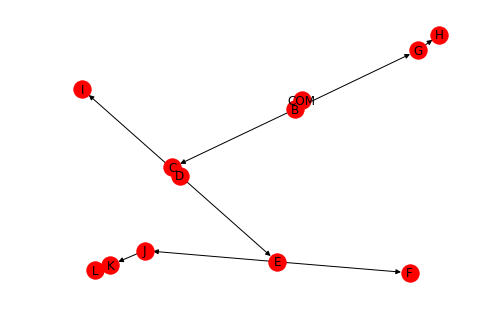

In [79]:
pos=nx.spring_layout(G,iterations=100)
nx.draw(G, pos)
labels=nx.draw_networkx_labels(G,pos)

In [80]:
# the number of orbits is the sum of the number of edges between COM and all other nodes

num_edges = 0
edges1 = []
#go through all nodes except COM and count the edges from COM to each:
for n in nodes_and_edges(test)[0][1:]:
    num_edges += nx.shortest_path_length(G, source='COM', target=n)
print(num_edges)

    

42


Now that the test worked, let's count the edges for the input:

In [97]:
#create the graph:
Gf = nx.DiGraph()
Gf.add_edges_from(nodes_and_edges(y)[1])

#get nodes except 'COM'
nodes_wo_com = [nd for nd in nodes_and_edges(y)[0] if nd != 'COM']

num_edges = 0
edges1 = []
#go through all nodes except COM and count the edges from COM to each:
for n in nodes_wo_com:
    num_edges += nx.shortest_path_length(Gf, source='COM', target=n)
print(num_edges)


295936


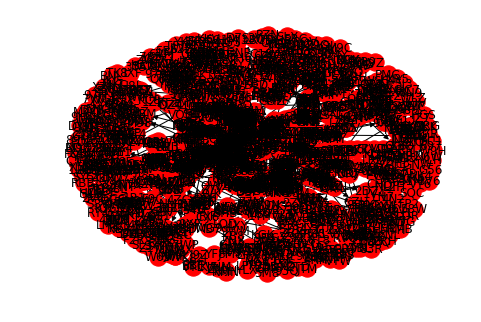

In [92]:
#drawing it out of curiosity:
pos=nx.spring_layout(Gf,iterations=100)
nx.draw(Gf, pos)
labels=nx.draw_networkx_labels(Gf,pos)